In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import os

In [0]:
!pip install keras==2.0.3

In [0]:
#@title
'''# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials'''

In [0]:
#@title
'''# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)'''

In [0]:
#@title
'''
file_id = '1jNtGxSPTDDsRQb26-Q9JHxE8ohdO0r6f'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('sample_train.csv')  '''

In [0]:
#@title
'''!wget -O sample_train.zip -P /content/ https://drive.google.com/open?id=1tmzNJahy-5gtdG54IP0d75v3lQLQTJw8
!unzip /content/sample_train -d content'''

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sample_train.csv')
train.head()

,image_name,class,x1,x2,y1,y2
0,JPEG_20160706_121146_1000145715002.png,1,115,495,143,325
1,JPEG_20161119_174038_1000690577600.png,1,23,457,61,409
2,147444927651111470309333776-Roadster-Men-Casua...,1,37,601,13,470
3,147772332675720161028_161611.png,1,27,602,162,385
4,1473315333651DeeplearnS11638.png,1,60,586,174,325


In [0]:
os.path.getsize('/content/drive/My Drive/Colab Notebooks/sample_train/1468667661276JPEG_20160712_153232_1000659454586.png')

240294

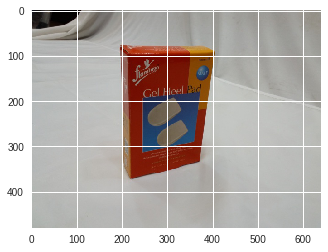

In [0]:
image = plt.imread('/content/drive/My Drive/Colab Notebooks/sample_train/1468666251726JPEG_20160712_160009_1000251747543.png')
plt.imshow(image)

In [0]:
train['image_name'].nunique()

100

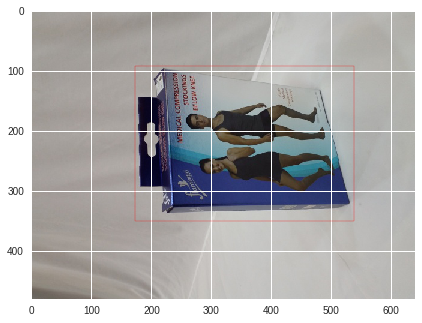

In [0]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('/content/drive/My Drive/Colab Notebooks/sample_train/1468667661276JPEG_20160712_153232_1000659454586.png')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.image_name == "1468667661276JPEG_20160712_153232_1000659454586.png"].iterrows():
    xmin = row.x1
    xmax = row.x2
    ymin = row.y1
    ymax = row.y2
    
    width = xmax - xmin
    height = ymax - ymin
    
    
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = 'r', facecolor = 'none')
    
    ax.add_patch(rect)

In [0]:
%cd /content/drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
!git clone https://github.com/kbardool/keras-frcnn.git

In [0]:
data = pd.DataFrame()
data['format'] = train['image_name']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = '../sample_train/' + data['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['x1'][i]) + ',' + str(train['y1'][i]) + ',' + str(train['x2'][i]) + ',' + str(train['y2'][i]) + ',' + str(train['class'][i])

data.to_csv('annotate1.txt', header=None, index=None, sep=' ')

In [0]:
%cd keras-frcnn
!python train_frcnn.py --num_epochs=20 -o simple -p annotate1.txt

/content/drive/My Drive/Colab Notebooks/keras-frcnn
Using TensorFlow backend.
Parsing annotation files
Training images per class:
{'1': 100, 'bg': 0}
Num classes (including bg) = 2
Config has been written to config.pickle, and can be loaded when testing to ensure correct results
Num train samples 80
Num val samples 20
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
loading weights from resnet50_weights_tf_dim_ordering_tf_kernels.h5
Could not load pretrained model weights. Weights can be found in the keras application folder 		https://github.com/fchollet/keras/tree/master/keras/applications
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Starting training
Epoch 1/20
2019-02-08 22:31:16.546289: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-02-08 22:31:16.546561: I tensorflow/compiler/xla/service/service.cc:150] XLA service

In [27]:
#!sudo apt-get update -y
!sudo apt-get install -y xterm

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libutempter0 libxxf86dga1 x11-utils xbitmaps
Suggested packages:
  mesa-utils xfonts-cyrillic
The following NEW packages will be installed:
  libutempter0 libxxf86dga1 x11-utils xbitmaps xterm
0 upgraded, 5 newly installed, 0 to remove and 21 not upgraded.
Need to get 907 kB of archives.
After this operation, 2,962 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libutempter0 amd64 1.1.6-3 [7,898 B]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 xbitmaps all 1.1.1-2 [28.1 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd64 xterm amd64 330-1ubuntu2 [661 kB]
Fetched 907 kB in 0s (2

In [28]:
!xterm

The full text of the error or warning message cannot be safely formatted
in this environment. You may get a more descriptive message by running the
program as a non-root user or by removing the suid bit on the executable.
xterm: Xt error: Can't open display: %s
xterm: DISPLAY is not set


In [22]:
!python test_frcnn.py -p '../sample_test'

Using TensorFlow backend.
{0: '1', 1: 'bg'}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Loading weights from ./model_frcnn.hdf5
2019-02-09 02:04:38.142046: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-02-09 02:04:38.142361: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x8496100 executing computations on platform Host. Devices:
2019-02-09 02:04:38.142400: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-02-09 02:04:38.243673: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-02-09 02:04:38.244387: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x8496520 executing computations on platform CUDA. Devices:
2019